# Clustering

In this course we go through clustering methods. It is divided into few parts:
1. Distributed clustering: 
    - K-means (HCM)
    - Fuzzy clustering (FCM)
    - Possibilistic clustering (PCM)
2. Hierarhical clustering: 
    - agglomerative
    - divisive
3. Density-based clustering
4. Quality metrics
5. Image segmentation

## Distributed clustering

We have three types of distributed clustering. The most known method is called k-means and assign each case to one cluster strictly.

### K-means

Is also known as hard c-means where k is the same as c and are the number of clusters that we are willing to divide the data set to. The steps of hcm are like following:
1. choose the entrance cluster centroids,
2. item calculate the assignation matrix $U$,
3. item calculate new centroids matrix $V$,
4. calculate the difference between previously assignation matrix $U$ and the new one calculated in current iteration.


Let's use the data set from the lecture:

|**Aircraft name** | **Distance range (km)** | **Seats count** | **Aircraft type** |
|------------------|-------------------------|-----------------|-------------------|
| Cesna 510 Mustang| 1940                    |             4   | private jet       |
| Falcon 10/100    | 2960                    |             9   | private jet       |
| Hawker 900/900XP | 4630                    |             9   | private jet       |
| ATR 72-600       | 1528                    |            78   | medium size aircraft|
| Bombardier Dash 8 Q400 | 2040              |            90   | medium size aircraft|
| Embraer ERJ145 XR| 3700                    |            50   | medium size aircraft|
| Boeing 747-8     | 14815                   |           467   | jet airliner      |
| A380-800         | 15200                   |           509   | jet airliner      |
| Boeing 787-8     | 15700                   |           290   | jet airliner      |
| Boeing 737-900ER | 6045                    |           215   | jet airliner      | 


Let's import two libraries that are needed to plot the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Now, we are ready to plot:

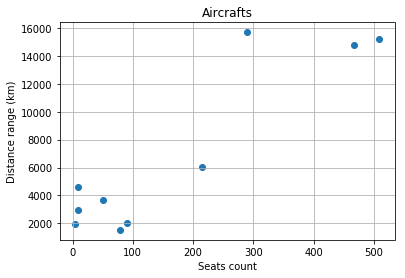

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

Before we go to the next step, we need to normalize our dataset:

In [3]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

Now, the data is between 0 and 1:

In [4]:
print(X_norm)

[[ 0.00785855  0.12356688]
 [ 0.01768173  0.18853503]
 [ 0.01768173  0.29490446]
 [ 0.15324165  0.09732484]
 [ 0.17681729  0.12993631]
 [ 0.09823183  0.23566879]
 [ 0.91748527  0.94363057]
 [ 1.          0.96815287]
 [ 0.5697446   1.        ]
 [ 0.42239686  0.38503185]]


Before we start, we should setup a few variables like the assignation matrix, number of clusters, the error margin and feature space:

In [5]:
data_set=X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.01
m = 2.0

assignation=np.zeros((len(X),groups))

The assignation matrix if filled with zeros as we don't have any guess for assignation yet. We can also fill it randomly with 1 and 0 for each group. The assignation matrix looks like following:

\begin{equation*}
U=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}.
\end{equation*}


It's time to generate centroid array randomly:
\begin{equation}
 V=[v_{1},v_{2},\ldots,v_{c}].
\end{equation}

We go through each group and add a random array of the feature space centroid positions:

In [6]:
import random

centers = []

def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

Let's take a look what centroids do we have:

In [7]:
print(centers)

[(0.9605668101815752, 0.3343954886191629), (0.9924628292162572, 0.8447995030413203)]


To check what is the distance between the centroids and the elements of data set we use the Euclidean distance:

\begin{equation}
 \rho_{Min}(x_{i},v_{j})=\sqrt{\sum_{i=1}^{d}(x_{i}-v_{j})^{2}}.
\end{equation}

In [8]:
import math

def calculate_distance(x,v):
    return math.sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)

The next step is to calculate the new assignation matrix:

\begin{equation}
 \mu_{ik}^{(t)}=
 \begin{cases}
 1 & \text{if } d(x_{k},v_{i})<d(x_{k},v_{j}),  \text{for each } j\neq i\\
 0 & \text{in other case} \\
 \end{cases}.
\end{equation}

In [9]:
def calculate_u(x, i):
    global centers
    if calculate_distance(x, centers[0]) < calculate_distance(x, centers[1]):
        return [1,0]
    else:
        return [0,1]

The third step is to calculate new centroids based on the new assignation matrix $U$:

\begin{equation}
 v_{i}=\frac{\sum_{k=1}^{M}\mu_{ik}^{(t)}x_{k}}{\sum_{k=1}^{M}\mu_{ik}^{(t)}}.
\end{equation}

The calculation is done in two steps: u_x_vector and u_scalar:

In [10]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

We are almost done here. The last step before we cluster is to set the rule that allow us to stop the loop.

In [11]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

It's time to combine all together:

In [12]:
def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u(data_set[i], iter))
        calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

Ready to build some new clusters: 

In [13]:
cluster()

The centers are like following:

In [14]:
print(centers)

[array([ 0.12770138,  0.20785259]), array([ 0.82907662,  0.97059448])]


And the assignation matrix looks like:

In [15]:
print(assignation)

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0]]


To plot it, we need to develop a short function that adds some colors to our plot:

In [16]:
red = X_norm[np.where(np.array(assignation)[:,0]==1)]
blue = X_norm[np.where(np.array(assignation)[:,1]==1)]

And finally plot the results:

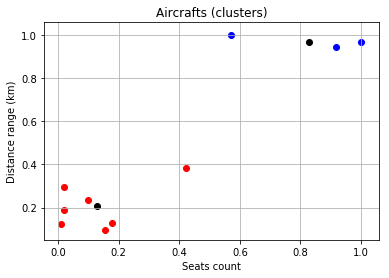

In [17]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

### Exercise 1: Modify the code to work for three groups (max. 15min.)

The obvious part is the variable groups, but the most changes needs to be done here:

In [18]:
groups = 3

select_centers()

def calculate_u_three(x):
    global centers
    global groups
    u_array = np.zeros(groups)
    minimal_distance = []
    for group in range(groups):
        minimal_distance.append(calculate_distance(x, centers[group]))
    min_group_id = np.argmin(minimal_distance)
    u_array[min_group_id] = 1
    return u_array

In [19]:
def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u_three(data_set[i]))
        calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [ ]:
cluster()

Goals:
1. Modify the calculate_u code.
2. Modify the parameters.
3. Execute the clustering.
4. Plot the results.

In [21]:
print(centers)

[array([ nan,  nan]), array([ 0.33811395,  0.43667516]), array([ nan,  nan])]


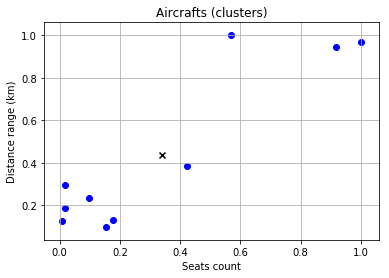

In [22]:
red = X_norm[np.where(np.array(assignation)[:,0]==1)]
blue = X_norm[np.where(np.array(assignation)[:,1]==1)]
green = X_norm[np.where(np.array(assignation)[:,2]==1)]

fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(green[:,0],green[:,1],c='green')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],marker='x',c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()


## Fuzzy k-means

The fuzzy implementation of k-means is a bit more complex and we need to modify the calculate_u function to be complient with the equation:

\begin{equation}
 \mu_{ik}=(\sum_{j=1}^{c}(\frac{d(x_{k},v_{i})}{d(x_{k},v_{j})})^{\frac{2}{m-1}})^{-1}
\end{equation}

In [23]:
def calculate_u(x,i):
    global centers
    if i == 0:
        sum=1.0+(calculate_distance(x, centers[0])/calculate_distance(x, centers[1]))**2
    else:
        sum=1.0+(calculate_distance(x, centers[1])/calculate_distance(x, centers[0]))**2
    return sum**-1

In [24]:
groups = 2 
assignation=np.zeros((len(X),groups))
centers=[]
select_centers()

In [25]:
print(centers)
#centers = [(0.5,0.6),(0.6,0.5)]

[(0.6346293243430908, 0.26833734308151236), (0.5708617450655565, 0.7666141571513084)]


In [26]:
def cluster():
    global assignation    
    global error_margin    
    global groups
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation_vector=[]
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i],k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)

        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [27]:
cluster()

In [28]:
print(centers)

[array([ 0.11240434,  0.19895771]), array([ 0.83355281,  0.96018619])]


In [29]:
print(assignation)

[[0.9881272048490749, 0.011872795150925064], [0.9928567187625089, 0.007143281237491207], [0.9838605224986795, 0.01613947750132047], [0.9901616458154537, 0.00983835418454615], [0.9921061314443828, 0.007893868555617314], [0.9985475105475743, 0.0014524894524257138], [0.006065481611455044, 0.9939345183885449], [0.019761834430741868, 0.9802381655692581], [0.07712434655416853, 0.9228756534458316], [0.7925941210173834, 0.20740587898261667]]


In [30]:
red = X_norm[np.where(np.array(assignation)[:,0]>0.5)]
blue = X_norm[np.where(np.array(assignation)[:,1]>0.5)]

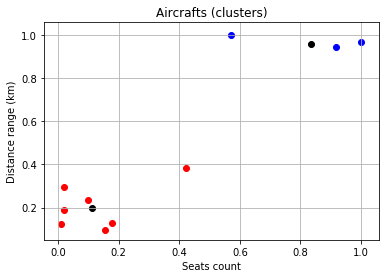

In [31]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

### Homework: Implement possibilistic k-means

Goal:
1. Implement the mahalanobis_distance function.
2. Implement the calculate_eta function.
3. Implement the calculate_u.

Hint: the assignation matrix should not be set to zeros at the beginning. The equations can be found in the slides. 

**Deadline:** 4.04.2018


## Density-based clustering

In density-based clustering the approach is different compared to distributed clustering. We need to implement all functions from scratch. DBScan is an example of a density-based clustering method. The goal is to find all element where the neighborhood is defined as:
\begin{equation}
    N_{\epsilon}:{q|d(p,q)\leq\epsilon},
\end{equation}
where $p$ and $q$ are two elements of the training data set and $\epsilon$ is the neighborhood distance.

Let's setup the variables as in previous examples. The are three new ones like distance_matrix, max_distance and number_of_cluster. The first one is clear, the second is a parameter that can be changed, depending on that how many neighborhood elements we would like to concider. The last variable is about the number of clusters that are calculated during clustering. It's not the exact number of clusters, but allow us count the clusters during clustering.

In [32]:
data_set = X_norm
assignation = np.zeros(len(data_set))
distance_matrix = np.zeros((len(data_set), len(data_set)))
max_distance = 0.35
number_of_cluster = 0
min_points = 2

To calculate the distance matrix we use the calculate_distance that we used previously:

In [33]:
def calculate_distance_matrix():
    global distance_matrix
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = calculate_distance(data_set[i], data_set[j])

In [34]:
print(distance_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


The next step is to get closest elements in the feature space:

In [35]:
def get_closest_elements(element_id):
    global max_distance
    global distance_matrix
    element_distances = distance_matrix[element_id]
    filtered = {}
    iter = 0
    for element in element_distances:
        if element < max_distance:
            filtered[iter] = element
        iter = iter + 1
    return filtered

The last step before cluster function is to define funtions that mark the elements in our data set that are known to be a noise or were already visited by our method.

In [36]:
def set_as_noise(element_id):
    global assignation
    assignation[element_id] = -1
    
def set_visited(elements):
    global assignation    
    global number_of_cluster
    for element_id in elements.keys():
        assignation[element_id] = number_of_cluster    

Combine it all together:

In [37]:
import random

def cluster():
    global number_of_cluster
    global data_set
    global assignation
    global min_points
    calculate_distance_matrix()
    element_ids = list(range(len(data_set)))
    random.shuffle(element_ids)
    for i in element_ids:
        if assignation[i] != 0:
            continue
        closest = get_closest_elements(i)
        if len(closest) < min_points:
            set_as_noise(i)
        else:
            set_visited(closest)
            number_of_cluster = number_of_cluster + 1

Ready to cluster:

In [38]:
cluster()

The number of cluster is:

In [39]:
print("Number of clusters: "+ str(len(np.unique(assignation))))

Number of clusters: 3


We can see it here as well:

In [40]:
print(assignation)

[ 1.  1.  1.  1.  1.  1.  2.  2. -1. -1.]


### Exercise: Plot the feature space with all element marked with differnet color, depending on the cluster that it's assigned

Use the code below to plot the results. You can play with the max_distance variable to get more or less groups.

In [41]:
print(assignation)

[ 1.  1.  1.  1.  1.  1.  2.  2. -1. -1.]


In [46]:
# for k-means:
assigned_groups = []
colors = ['red','blue','green','orange','black','yellow']

for el in range(len(X_norm)):
    group_id = np.argmax(assignation[el])
    assigned_groups.append(group_id)

In [47]:
def get_colours(color_id):
    global X_norm
    print(color_id)
    print(X_norm[np.where(np.array(assigned_groups)[:]==color_id)])
    return X_norm[np.where(np.array(assigned_groups)[:]==color_id)]

[ 1.  1.  1.  1.  1.  1.  2.  2. -1. -1.]
-1.0
[[ 0.5697446   1.        ]
 [ 0.42239686  0.38503185]]
1.0
[[ 0.00785855  0.12356688]
 [ 0.01768173  0.18853503]
 [ 0.01768173  0.29490446]
 [ 0.15324165  0.09732484]
 [ 0.17681729  0.12993631]
 [ 0.09823183  0.23566879]]
2.0
[[ 0.91748527  0.94363057]
 [ 1.          0.96815287]]


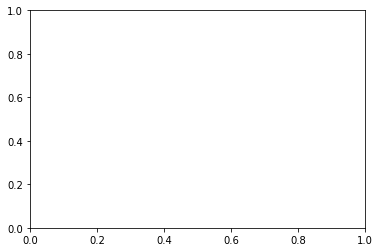

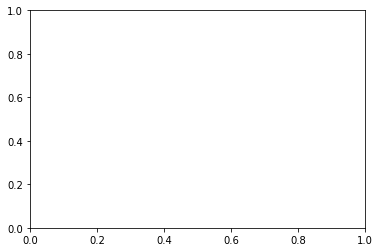

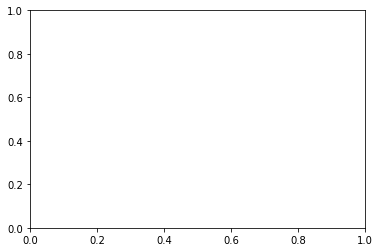

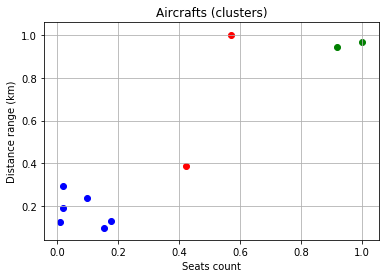

In [49]:
colors = ['red','blue','green','orange','black','yellow']

fig, ax = plt.subplots()

# your code or modifications comes here:
# for dbscan:
assigned_groups = assignation
print(assigned_groups)
#for group in range(groups):
for group in np.unique(assigned_groups):
    small_set = get_colours(group)    
    ax.scatter(small_set[:,0],small_set[:,1],c=colors.pop(0))
# k-means:
#ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],marker='x',c='black')
# ends here
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

## Hierchical methods

We have two different types of hierarchical methods:
- agglomerative,
- divisive.

Both got the same concept:



### Agglomerative clustering

Pydot enables to use graphviz to visualize a tree.

In [51]:
import pydot

We need to keep the dendrogram and the history, so we can easily draw it.

In [52]:
data_set = X_norm
distance_matrix = np.zeros((len(data_set), len(data_set)))
current_dendrograms = []
 
for iter in range(len(data_set)):
    current_dendrograms.append(data_set[iter])
dendrograms_history = []

dendrograms_hist = []
for iter in [range(len(data_set))]:
    dendrograms_hist.append(iter)

The tree object is the root where each edge is added.

In [53]:
tree = pydot.Dot(graph_type='graph')

The Euclidean distance was already used, but this time we can encapsulate it into a class, to be clear it's Euclidean distance:

In [54]:
class EuclidesianDistance:

    def get_distance(self, x1, x2):
        return math.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)

In agglomerative we merge two clusters together on each step:

In [55]:
def merge_elements(merged_list, i):
    global current_dendrograms
    if isinstance(current_dendrograms[i][0], type(np.array([]))):
        for iter in range(len(current_dendrograms[i])):
            merged_list.append(current_dendrograms[i][iter])
    else:
        merged_list.append(current_dendrograms[i])
    return merged_list

We need to set the current dendrogram level at each step:

In [57]:
def set_current_dendrogram(i, j):
    global dendrograms_hist
    global current_dendrograms
    elements = []
    hist = []
    current_hist = dendrograms_hist[-1]
    for iter in range(len(current_dendrograms)):
        if iter != i and iter !=j:
            elements.append(current_dendrograms[iter])
            hist.append(current_hist[iter])
    merged_elements = []
    merged_elements = merge_elements(merged_elements, i)
    merged_elements = merge_elements(merged_elements, j)
    elements.append(merged_elements)
    hist.append([current_hist[i],current_hist[j]])
    dendrograms_hist.append(hist)
    current_dendrograms = elements

At each stage a distance matrix needs to be calculated:

In [58]:
def calculate_dendogram_distance_matrix():
    global current_dendrograms
    global distance_matrix
    distance_matrix = np.zeros((len(current_dendrograms), len(current_dendrograms)))
    euclidean = EuclidesianDistance()
    for i in range(len(current_dendrograms)):
        for j in range(len(current_dendrograms)):
            distance_matrix[i, j] = euclidean.get_distance(calculate_centroid(current_dendrograms[i]),calculate_centroid(current_dendrograms[j]))

The code abobve needs the centroids' average:

In [59]:
def calculate_centroid(dendrogram_elements):
    global data_set
    if type(dendrogram_elements) is list:
        sum=np.zeros(len(dendrogram_elements[0]))
        for iter in range(len(dendrogram_elements)):
            sum=np.add(sum,np.array(dendrogram_elements[iter]))
        if sum.shape == (len(data_set[0]),len(data_set[0])):
            pass
        return np.divide(sum*1.0, len(dendrogram_elements)*1.0)
    else:
        return dendrogram_elements

For agglomerative we take the lowest distance from the distance matrix:

In [60]:
def get_lowest_from_distance_matrix():
    global distance_matrix
    lowest_indexes = [0,1]
    lowest_value = distance_matrix[0,1]
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix)):
            if i != j:
                if lowest_value > distance_matrix[i,j]:
                    lowest_value = distance_matrix[i,j]
                    lowest_indexes = [i,j]
    return lowest_indexes

Combine it together:

In [61]:
def cluster():
    global current_dendrograms
    for iter in range(len(current_dendrograms)-2):
        calculate_dendogram_distance_matrix()
        [i, j] = get_lowest_from_distance_matrix()
        dendrograms_history.append(current_dendrograms)
        set_current_dendrogram(i, j)

And execute it:

In [62]:
cluster()

In [63]:
print(dendrograms_hist)

[range(0, 10), [0, 1, 2, 5, 6, 7, 8, 9, [3, 4]], [2, 5, 6, 7, 8, 9, [3, 4], [0, 1]], [2, 5, 8, 9, [3, 4], [0, 1], [6, 7]], [8, 9, [3, 4], [0, 1], [6, 7], [2, 5]], [8, 9, [3, 4], [6, 7], [[0, 1], [2, 5]]], [8, 9, [6, 7], [[3, 4], [[0, 1], [2, 5]]]], [9, [[3, 4], [[0, 1], [2, 5]]], [8, [6, 7]]], [[8, [6, 7]], [9, [[3, 4], [[0, 1], [2, 5]]]]]]


We use pydot to print the dendrogram:

In [64]:
def add_edge(level, acesor):
    global tree
    new_edge = pydot.Edge(str(acesor), str(level))
    tree.add_edge(new_edge)
    if isinstance(level,list):
        add_edge(level[0],level)
        add_edge(level[1],level)

In [65]:
def show_tree():
    global dendrograms_hist
    global tree
    current_list = dendrograms_hist.pop()
    add_edge(current_list.pop(),"root")
    tree.write('tree_agg.png',format='png')

Take a look at tree_agg.png if generated.

In [66]:
show_tree()

FileNotFoundError: [Errno 2] "dot" not found in path.

### Divisive clustering

Compared to the previous methods, we do the same, but in the opposite direction. We setup the same data, but the current dendrogram contains the whole data set as one cluster. 

In [67]:
data_set = X_norm
distance_matrix = np.zeros((len(data_set), len(data_set)))
current_dendrograms = []
current_dendrograms.append(data_set)
dendrograms_history = []
clusters = 0

This is the same distance matrix methods as used for agglomerative method:

In [68]:
def calculate_dendogram_distance_matrix():
    global distance_matrix
    distance_matrix=np.zeros((len(data_set), len(data_set)))
    euclidean = EuclidesianDistance()
    for i in range(len(data_set)):
        for j in range(len(data_set)):
            distance_matrix[i, j] = euclidean.get_distance(calculate_centroid(data_set[i]),calculate_centroid(data_set[j]))


Take the highest average distance:

In [69]:
def get_highest_dissimilarity_average(cluster):
    highest_distance = np.average(np.array(distance_matrix[cluster[0]]))
    highest_iter = cluster[0]
    for iter in cluster:
        average_distance = np.average(np.array(distance_matrix[iter]))
        if highest_distance < average_distance:
            highest_iter=iter
            highest_distance=average_distance
    return highest_iter

In [70]:
def all_negative(cluster_id, element_id):
    global distance_matrix
    global current_dendrograms
    is_all_negative = True
    new_matrix = calculate_new_dist_matrix(cluster_id)
    for iter in range(len(new_matrix)):
        if (np.average(np.array(new_matrix[iter])) - distance_matrix[current_dendrograms[cluster_id][iter], element_id]) > 0:
            is_all_negative = False
    return is_all_negative

In [71]:
def calculate_new_dist_matrix(cluster_id):
    global distance_matrix
    global current_dendrograms
    global data_set
    matrix = np.matrix(distance_matrix)
    ids = current_dendrograms[cluster_id]
    for iter in list(range(len(data_set)-1,-1,-1)):
        if iter not in ids:
            matrix = np.delete(matrix, iter, 0)
            matrix = np.delete(matrix, iter, 1)
    return matrix

In [72]:
def get_highest_positive(cluster_id, element_id):
    global current_dendrograms
    current_cluster = current_dendrograms[cluster_id]
    dist_matrix = calculate_new_dist_matrix(cluster_id)
    max = np.average(current_cluster[0])
    max_id = 0
    for iter in range(len(current_cluster)):
            if (np.average(np.array(dist_matrix[iter])) - distance_matrix[current_dendrograms[cluster_id][iter], element_id]) > max:
                max = (np.average(np.array(dist_matrix[iter])) - distance_matrix[current_dendrograms[cluster_id][iter], element_id])
                max_id = iter
    return current_dendrograms[cluster_id][max_id]

In [73]:
def get_diam(cluster_id):
    dist_matrix = calculate_new_dist_matrix(cluster_id)
    return np.matrix(dist_matrix).max()

def choose_cluster():
    max = get_diam(0)
    max_id = 0
    for iter in range(len(current_dendrograms)):
        if max < get_diam(iter):
            max_id = iter
    return max_id

Combine it all together:

In [76]:
from copy import deepcopy

def cluster():
    global current_dendrograms
    global data_set
    current_dendrograms=[list(range(len(data_set)))]
    while len(current_dendrograms) != len(data_set):
        current = deepcopy(current_dendrograms)
        split_cluster = []
        cluster_id = choose_cluster()
        highest_id = get_highest_dissimilarity_average(current_dendrograms[cluster_id])
        split_cluster.append(highest_id)
        current_dendrograms[cluster_id].remove(highest_id)
        all_positive = True
        while all_positive:
            if all_negative(cluster_id, highest_id):
                all_positive = False
            else:
                highest_diff_id = get_highest_positive(cluster_id, highest_id) # do poprawki
                split_cluster.append(highest_diff_id)
                current_dendrograms[cluster_id].remove(highest_diff_id)
        level = [item for item in current[cluster_id] if item not in split_cluster]
        hist = [{"acesor": current[cluster_id] , "levels": [deepcopy(split_cluster), level]}]
        dendrograms_history.append(hist)
        current_dendrograms.append(split_cluster)

In [77]:
cluster()

In [78]:
tree = pydot.Dot(graph_type='graph')

### Exercise 3: Build a decision tree graph using dendrograms_history and pydot.

## Clustering quality metrics

In [79]:
def calculate_s_1(centers,assignation,data_set):
    s1 = []
    for center_1 in range(len(centers)):
        for center_2 in range(len(centers)):
            if center_1 == center_2:
                break
            ids_1 = np.where(assignation[:, center_1] == 1)[0]
            ids_2 = np.where(assignation[:, center_2] == 1)[0]
            elements_1 = data_set[ids_1]
            elements_2 = data_set[ids_2]
            s_1 = 1.0 / (len(ids_1) * len(ids_2))
            for element_1 in elements_1:
                for element_2 in elements_2:
                    s_1 = s_1 * math.sqrt(calculate_distance(element_1, element_2) ** 2)
            s1.append(s_1)
    return s1

In [80]:
def calculate_s_2(centers):
    s2 = []
    for center_1 in range(len(centers)):
        for center_2 in range(len(centers)):
            if center_1 == center_2:
                break
            s2.append(calculate_distance(centers[center_1], centers[center_2]))
    return s2

In [81]:
def calculate_s_s_1(s1, sigma_1):
    s_1_sum = 0.0
    sigma_1_sum = 0.0
    for s_1 in s1:
        s_1_sum = s_1_sum + s_1
    for sigma_1 in sigma_1:
        sigma_1_sum = sigma_1_sum + sigma_1
    s_s1 = s_1_sum / sigma_1_sum
    return s_s1

In [82]:
def calculate_sigma_1(assignation,data_set):
    sigma_1 = []
    unique_labels = np.unique(assignation[0])
    for label_id in range(len(unique_labels)):
        ids = np.where(assignation[:, label_id] == 1)[0]
        if len(ids) == 1:
            m = 1
        else:
            m = (len(ids) - 1.0) * len(ids) / 2.0
        elements = data_set[ids]
        sigma = (1.0 / m)
        for element_x_1 in range(len(elements)):
            for element_x_2 in range(len(elements)):
                if element_x_1 == element_x_2:
                    continue
                distance = calculate_distance(elements[element_x_1], elements[element_x_2])
                if distance != 0:
                    sigma = sigma + (distance ** 2)
        sigma_1.append(sigma)
    return sigma_1

In [83]:
def calculate_sigma_2(centers,assignation,data_set):
    sigma_2 = []
    for center_id in range(len(centers)):
        ids = np.where(assignation[:, center_id] == 1)[0]
        elements = data_set[ids]
        sigma = 1.0 / len(ids)
        for element_id in range(len(elements)):
            distance = calculate_distance(elements[element_id], centers[center_id])
            if distance != 0:
                sigma = sigma + (distance) ** 2
        sigma_2.append(sigma)
    return sigma_2

In [84]:
def dunn_index(assignation,data_set):
    minimum_distance = 1
    maximum_distance = 0
    unique_labels = np.unique(assignation[0])
    for label_id_1 in range(len(unique_labels)):
        ids_1 = np.where(assignation[:, label_id_1] == 1)[0]
        for label_id_2 in range(len(unique_labels)):
            if label_id_1 == label_id_2:
                break
            ids_2 = np.where(assignation[:, label_id_2] == 1)[0]
            for element_1 in data_set[ids_1]:
                for element_2 in data_set[ids_2]:
                    distance = calculate_distance(element_1, element_2)
                    if distance > maximum_distance:
                        maximum_distance = distance
                    if distance < minimum_distance:
                        minimum_distance = distance
    dunn_index = minimum_distance / maximum_distance
    return dunn_index

In [ ]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

space=[[0,1],[0,1]]
error_margin = 0.01
centers = []
m = 2.0

data_set=X_norm


def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers
    
def calculate_u_three(x):
    global centers
    global groups
    u_array = np.zeros(groups)
    minimal_distance = []
    for group in range(groups):
        minimal_distance.append(calculate_distance(x, centers[group]))
    min_group_id = np.argmin(minimal_distance)
    u_array[min_group_id] = 1
    return u_array    

def cluster():
    global assignation    
    global error_margin
    global data_set
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u_three(data_set[i]))
        calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [ ]:
groups = 2
assignation=np.zeros((len(X),groups))
cluster()

s1_2 = calculate_s_1(centers,np.array(assignation),data_set)
sigma1_2 = calculate_sigma_1(np.array(assignation),data_set)
s2_2 = calculate_s_2(centers)
s_s_1_2 = calculate_s_s_1(s1_2,sigma1_2)
sigma2_2 = calculate_sigma_2(centers,np.array(assignation),data_set)

dunn_2 = dunn_index(np.array(assignation),data_set)

print(s1_2)
print(sigma1_2)
print(s_s_1_2)
print(sigma2_2)
print(dunn_2)

In [ ]:
centers = []
select_centers()
groups = 3
m=2
assignation=np.zeros((len(X),groups))
cluster()

s1_3 = calculate_s_1(centers,np.array(assignation),data_set)
s2_3 = calculate_s_2(centers)
sigma2_3 = calculate_sigma_2(centers,np.array(assignation),data_set)
dunn_3 = dunn_index(np.array(assignation),data_set)
sigma1_3 = calculate_sigma_1(np.array(assignation),data_set)

s_s_1_3 = calculate_s_s_1(s1_3,sigma1_3)

print(s1_3)
print(s2_3)
print(s_s_1_3)
print(sigma2_3)
print(dunn_3)

## Image segmentation

In [93]:
class ImageConversion:

    def get_image_from_url(self, img_url):
        image = open(img_url,'rb')
        return img.imread(image)

    def get_unique_colours(self, image_matrix):
        feature_matrix = []
        for i in range(len(image_matrix)):
            for j in range(len(image_matrix[0])):
                feature_matrix.append(image_matrix[i, j])
        feature_matrix_np = numpy.array(feature_matrix)
        uniques, index = numpy.unique([str(i) for i in feature_matrix_np], return_index=True)
        return feature_matrix_np[index], feature_matrix

    def save_image(self, size, pixel_matrix, unique_matrix, assignation_matrix, colours, output):
        image_out = Image.new("RGB", size)
        pixels = []
        for i in range(len(pixel_matrix)):
            pixel_list = pixel_matrix[i].tolist()
            for j in range(len(unique_matrix)):
                if(pixel_list == unique_matrix[j].tolist()):
                    for k in range(len(colours)):
                        if assignation_matrix[j][k] == 1:
                            segmented_colours=[int(i) for i in (colours[k]*255)]
                            pixels.append(tuple(segmented_colours))
        image_out.putdata(pixels)
        image_out.save(output)

In [94]:
class Segmentation:

    def __init__(self, feature_matrix, groups):
        self.__data_set = feature_matrix
        self.__groups = groups
        self.__space=[[0, 255], [0, 255], [0, 255]]
        self.__error_margin = 0.5
        self.assignation = numpy.zeros((len(self.__data_set), self.__groups))
        self.centers = []
        self.select_centers()

    def select_centers(self):
        if len(self.centers) == 0:
            iter=0
            while iter<self.__groups:
                self.centers.append(((random.randrange(0, 255)*1.0/255),
                                     (random.randrange(0, 255)*1.0/255),
                                     (random.randrange(0, 255)*1.0/255)))
                iter=iter+1

    def calculate_distance(self, x, v):
        return math.sqrt((x[0]-v[0])**2+(x[1]-v[1])**2+(x[2]-v[2])**2)

    def calculate_u(self, x, i):
        smallest_distance = float(self.calculate_distance(x, self.centers[0]))
        smallest_id = 0
        for i in range(1, self.__groups):
            distance = self.calculate_distance(x, self.centers[i])
            if distance < smallest_distance:
                smallest_id = i
                smallest_distance = distance
        distance = numpy.zeros(self.__groups)
        distance[smallest_id]=1
        return distance

    def calculate_new_centers(self, u):
        new_centers=[]
        for c in range(self.__groups):
            u_x_vector = numpy.zeros(len(self.centers[0]))
            u_scalar = 0
            for i in range(len(u)):
                u_scalar = u_scalar + u[i][c]
                u_x_vector = numpy.add(u_x_vector, numpy.multiply(u[i][c], self.__data_set[i]))
            new_centers.append(numpy.divide(u_x_vector,u_scalar))
        self.centers = new_centers

    def calculate_differences(self,new_assignation):
        diff=0
        for i in range(len(self.assignation)):
            for j in range(self.__groups):
                diff = diff + abs(float(new_assignation[i][j]) - float(self.assignation[i][j]))
        return diff

    def do_segmentation(self):
        difference_limit_not_achieved = True
        iter = 0
        while difference_limit_not_achieved:
            new_assignation = []
            for i in range(len(self.__data_set)):
                new_assignation.append(self.calculate_u(self.__data_set[i], iter))
            self.calculate_new_centers(new_assignation)

            if iter > 0:
                if self.calculate_differences(new_assignation) < self.__error_margin:
                    difference_limit_not_achieved=False
            self.assignation = new_assignation
            iter = iter + 1

    def get_results(self):
        return self.centers, self.assignation

    def print_results(self):
        print(self.assignation)
        print(self.centers)

In [95]:
import numpy
import random
import math
import matplotlib.image as img
from PIL import Image

image_to_segment = "logo_krakow.png"
image_converter = ImageConversion()
image_data = image_converter.get_image_from_url(image_to_segment)
unique_image_data, image_data_list = image_converter.get_unique_colours(image_data)

groups = 3

segmentation = Segmentation(unique_image_data, groups)
segmentation.do_segmentation()
#segmentation.print_results()
centers, assignation_matrix = segmentation.get_results()

image_size = (232, 258)
image_converter.save_image(image_size, image_data_list, unique_image_data, assignation_matrix, centers, "output.png")


/home/krzysztof/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


## Homework #2

Implement the Czekanowski-Dice index. 

\begin{equation}
C=2\frac{P\times R}{R+R}.
\end{equation}
Precision is defined as:
\begin{equation}
PPV=\frac{\#TP}{\#TP+\#FP}.
\end{equation}
Recall is defined as:
\begin{equation}
TPR=\frac{\#TP}{\#TP+\#FN}.
\end{equation}

In [90]:
def czekanowski_dice_index(data_set,assignation,labels):
    assigned_groups = []
    tp=0
    fp=0
    fn=0
    for el in range(len(assignation)):
        group_id = np.argmax(assignation[el])
        assigned_groups.append(group_id)
    # your code goes here:
        if assignation[el]==1 && labels[el]==1:
            tp=tp+1
        if assignation[el]==1 && labels[el]==0:
            fp=fp+1
        if assignation[el]==0 && labels[el]==1:
            fn=fn+1
            
    ppv=tp/(tp+fp)
    tpr=tp/(tp+fn)
    
    return 2*(ppv*tpr)/(ppv+tpr)

In [92]:
print(assigned_groups)
print(group_id)

[ 1.  1.  1.  1.  1.  1.  2.  2. -1. -1.]
0
